# 1. Make a dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

score = np.array([25, 49, 42, 57, 72, 68])
hours = np.array([2, 3, 4, 5, 6, 7])

### Plot dataset

(0.0, 100.0)

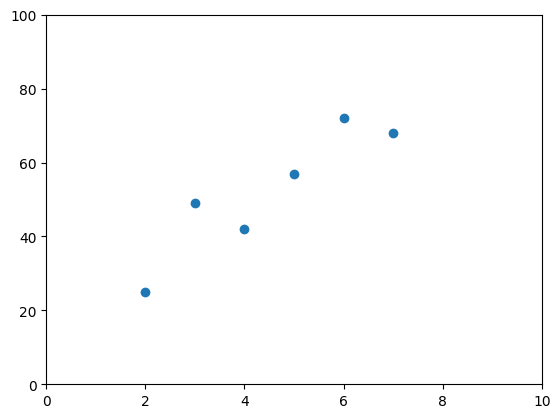

In [2]:
plt.scatter(hours, score)
plt.xlim(0,10)
plt.ylim(0,100)

# 2. Linear Regression
### Model: f(x) = wx+b
### Parameters: w=3, b=35

In [4]:
def model(x):
    w=3
    b=35
    return w*x +b

hours_0to10 = np.linspace(0, 10, 11)
h = model(hours_0to10)
print(h)

[35. 38. 41. 44. 47. 50. 53. 56. 59. 62. 65.]


(0.0, 100.0)

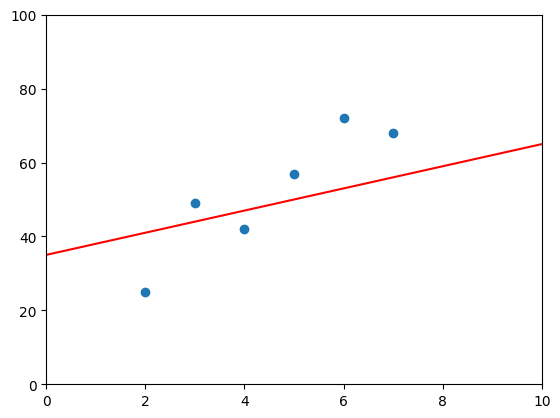

In [10]:
plt.plot(hours_0to10, h, 'r')
plt.scatter(hours, score) # scatter plot
plt.xlim(0,10)
plt.ylim(0,100)

# 3. Fitting Line and Cost Depending on w value

(0.0, 100.0)

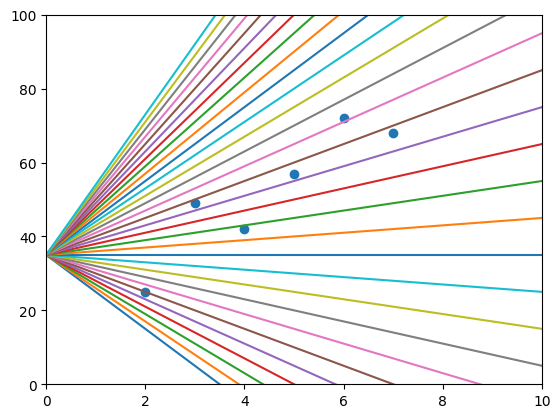

In [11]:
def model(x, w=3, b=35):
    return w*x +b

for i in range(-10,20,1):
    h = model(hours_0to10, w=i)
    plt.plot(hours_0to10,h)

plt.scatter(hours, score)
plt.xlim(0,10)
plt.ylim(0,100)

### Cost Function
### MSE: $\frac{1}{n}(y-\hat{y})^2$ 

In [12]:
def cost(y, y_hat):
    return np.mean((y-y_hat)**2)

h = model(hours)
loss = cost(score, h)
print(loss)

143.33333333333334


### Cost VS w value Plot

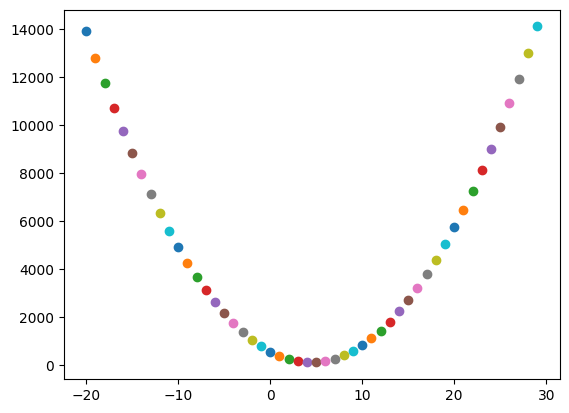

In [13]:
for i in range(-20,30,1):
    h = model(hours, w=i)
    loss = cost(score, h)
    plt.scatter(i, loss)


# 4. Fitting Line and Cost Function Depending on b value

(0.0, 100.0)

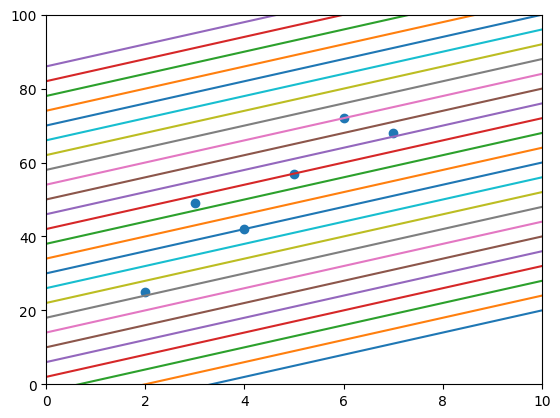

In [14]:
for i in range(-10,90,4):
    h = model(hours_0to10, b=i)
    plt.plot(hours_0to10,h)

plt.scatter(hours, score)
plt.xlim(0,10)
plt.ylim(0,100)

### Cost vs b Value Plot

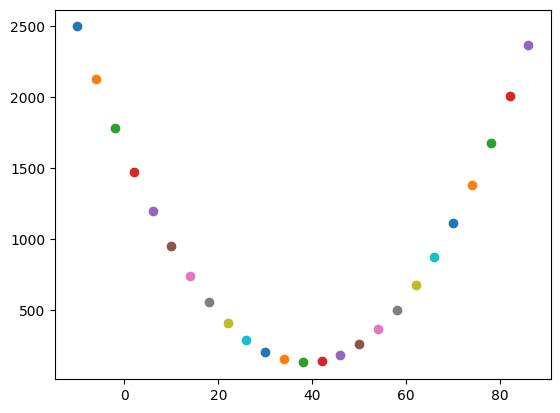

In [15]:
for i in range(-10,90,4):
    h = model(hours, b=i)
    loss = cost(score, h)
    plt.scatter(i, loss)

# 5. Gradient Descent and Parameter Update
### $w=w-\alpha \frac{\partial L(\theta)}{\partial W}$
### $\frac{\partial L(\theta)}{\partial W} = \frac{2}{n}\sum x((wx+b)-y)$

### $b=b-\alpha \frac{\partial L(\theta)}{\partial b}$
### $\frac{\partial L(\theta)}{\partial b} = \frac{2}{n}\sum ((wx+b)-y)$

### Initialization 

In [16]:
w = np.random.uniform()
b = np.random.uniform()

w_init = w
b_init = b
 
print(w)
print(b)

0.16788204631853498
0.11333815193964014


### Hyperparameter Settings

In [17]:
#hyperparameter
lr = 0.001
epochs = 10000

### Gradient descent and update

In [18]:
n = hours.shape[0]

loss = []

for i in range(epochs):
    h = model(hours, w=w, b=b)
    
    loss.append(cost(score, h))
    dW = (2/n) * sum(hours * (h-score))
    db = (2/n) * sum(h-score)

    w = w - lr * dW
    b = b - lr * db
    
    print(loss[-1])


2876.325340768282
2611.673949962687
2371.864296310864
2154.564517271903
1957.6616393354907
1779.241031181391
1617.5677855452288
1471.0698487453403
1338.3227338199085
1218.0356686228658
1109.0390441807758
1010.273041256807
920.7773245249808
839.6817041394314
766.1976738905282
699.6107436637341
639.2734916409981
584.5992686833438
535.0564936752177
490.16348435775757
449.4837733852964
412.62186405780784
379.21938445745764
348.95160259156256
321.5242686547395
296.670753703969
274.1494569226667
253.74145626164466
235.24837961147807
218.49047580526803
203.30486669397283
189.54396329724818
177.07403062823525
165.77388723645615
155.53372682299945
146.25405046921665
137.8446990957825
130.22397674361773
123.31785615133727
117.05925890415493
111.3874031543126
106.24721257018034
101.58878076656747
97.3668860082931
93.54055146792767
90.07264676159296
86.9295268880985
84.08070506041277
81.49855624803594
79.15804854748023
77.03649976866927
75.11335687026813
73.36999609914471
71.78954189049
70.3567027

(0.0, 300.0)

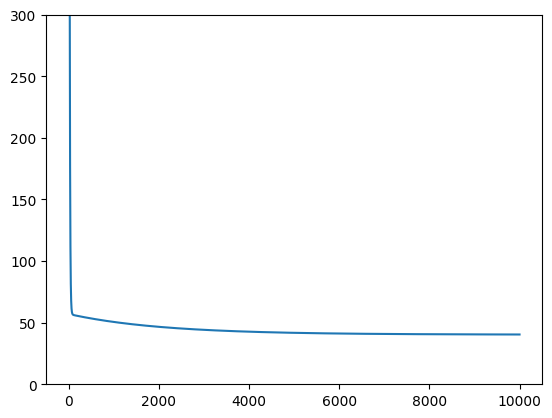

In [19]:
plt.plot(loss)
plt.ylim(0,300)

### Comparison parameter values

In [20]:
print(f'Before: w: {w_init}, b: {b_init})')
print(f'After: w: {w}, b: {b})')


Before: w: 0.16788204631853498, b: 0.11333815193964014)
After: w: 8.741898855977764, b: 12.704478509828308)


### Result

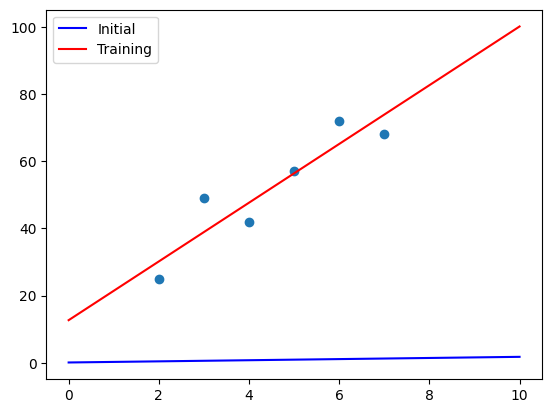

In [23]:
h      = model(hours_0to10, w=w,b=b)
h_init = model(hours_0to10, w=w_init, b=b_init)

plt.scatter(hours, score)
plt.plot(hours_0to10,h_init, label='Initial', color='b')
plt.plot(hours_0to10,h, label='Training', color='r')
plt.legend()
plt.show()
